<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Chaos_Theory_Analysis_for_Stock_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


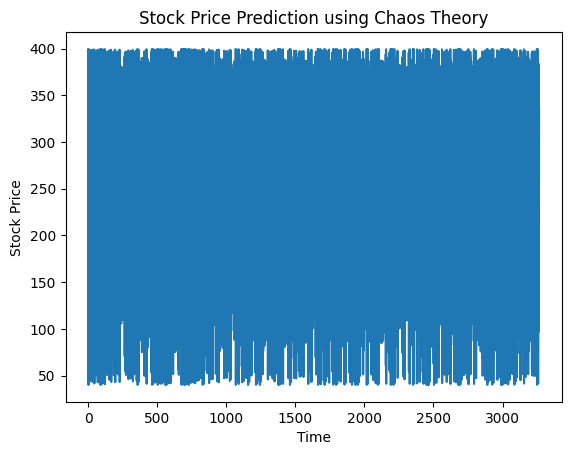

Trading Instruction: Buy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Download historical data for TSLA stock
df = yf.download('TSLA', start='2010-01-01', end='2023-06-17')

# Extract the closing prices from the dataframe
stock_prices = df['Close'].values

# Generate chaotic data
def generate_chaos(x0, r, n):
    x = np.zeros(n)
    x[0] = x0
    for i in range(1, n):
        x[i] = r * x[i-1] * (1 - x[i-1])
    return x

# Generate stock price data
def generate_stock_prices(x0, r, n, actual_prices):
    chaos_data = generate_chaos(x0, r, n)
    min_price = min(actual_prices)
    max_price = max(actual_prices)
    stock_prices = min_price + (max_price - min_price) * chaos_data
    return stock_prices

# Plot stock prices
def plot_stock_prices(stock_prices):
    plt.plot(stock_prices)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction using Chaos Theory')
    plt.show()

# Perform analysis and provide trading instructions
def analyze_stock(stock_prices):
    previous_price = stock_prices[-2]
    current_price = stock_prices[-1]

    if current_price > previous_price:
        return 'Buy'
    elif current_price < previous_price:
        return 'Sell'
    else:
        return 'Hold'

# Parameters for chaos and stock price generation
x0 = 0.5  # Initial condition
r = 3.9  # Control parameter
n = len(stock_prices) + 1  # Number of data points

# Generate chaotic stock price data
chaotic_prices = generate_stock_prices(x0, r, n, stock_prices)

# Plot stock prices
plot_stock_prices(chaotic_prices)

# Analyze stock prices and provide trading instructions
trading_instruction = analyze_stock(chaotic_prices)
print('Trading Instruction:', trading_instruction)
